In [10]:
# %pip install matplotlib seaborn
import pandas as pd

# Create the dataset
# data = {
#     'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'FirstName': ['John', 'Jane', 'Michael', 'Emily', 'David', 'Alice', 'Robert', 'Laura', 'James', 'Emma'],
#     'LastName': ['Doe', 'Smith', 'Johnson', 'Williams', 'Brown', 'Davis', 'Wilson', 'Moore', 'Taylor', 'Anderson'],
#     'Role': ['Software Engineer', 'Data Scientist', 'UX Designer', 'Product Manager', 'QA Engineer', 'DevOps Engineer', 'Backend Developer', 'Frontend Developer', 'HR Manager', 'Marketing Specialist'],
#     'Department': ['Development', 'Data Science', 'Design', 'Management', 'Quality Assurance', 'Operations', 'Development', 'Development', 'Human Resources', 'Marketing'],
#     'Salary': [70000, 75000, 68000, 80000, 65000, 72000, 71000, 69000, 73000, 67000],
#     'StartDate': ['2022-01-15', '2021-06-01', '2023-03-10', '2020-11-01', '2022-07-15', '2021-09-20', '2023-02-05', '2022-10-25', '2020-12-01', '2021-08-15'],
#     'Project': ['Project Alpha', 'Project Beta', 'Project Gamma', 'Project Delta', 'Project Epsilon', 'Project Zeta', 'Project Alpha', 'Project Beta', 'NA', 'Project Gamma'],
#     'PerformanceRating': [4.5, 4.7, 4.2, 4.6, 4.1, 4.3, 4.4, 4.0, 4.8, 4.2]
# }

# Convert to DataFrame
# df = pd.DataFrame(data)

# Save to CSV
# df.to_csv('startup_data.csv', index=False)


# Load the dataset
df = pd.read_csv('startup_data.csv')

# Display the last few rows of the dataset
df.tail()

# Trim whitespace from column names
df.columns = df.columns.str.strip()
df.columns


Index(['EmployeeID', 'FirstName', 'LastName', 'Role', 'Department', 'Salary',
       'StartDate', 'Project', 'PerformanceRating'],
      dtype='object')

In [11]:
# Display information about the dataset
df.info()

# Describe the dataset to get statistical summaries
df.describe()

# Display unique values in the 'Department' column
df['Department'].unique() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         100 non-null    int64  
 1   FirstName          100 non-null    object 
 2   LastName           100 non-null    object 
 3   Role               100 non-null    object 
 4   Department         100 non-null    object 
 5   Salary             100 non-null    int64  
 6   StartDate          100 non-null    object 
 7   Project            100 non-null    object 
 8   PerformanceRating  100 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.2+ KB


array([' Development      ', ' Data Science     ', ' Design           ',
       ' Management       ', ' Quality Assurance', ' Operations       ',
       ' Human Resources  ', ' Marketing        ', ' Documentation    ',
       ' Sales            ', ' Customer Service ', ' Finance          ',
       ' IT               '], dtype=object)

In [12]:
# Calculate the average salary for each role
avg_salary_by_role = df.groupby('Role')['Salary'].mean()
avg_salary_by_role


Role
Agile Coach                      79000.000000
Backend Developer                72333.333333
Business Analyst                 76000.000000
Business Intelligence Analyst    74000.000000
Cloud Architect                  80000.000000
                                     ...     
UI Designer                      68666.666667
UI/UX Designer                   70000.000000
UX Designer                      69666.666667
UX Researcher                    70000.000000
UX/UI Designer                   69000.000000
Name: Salary, Length: 63, dtype: float64

In [13]:
# Count the occurrences of each performance rating
performance_distribution = df['PerformanceRating'].value_counts()
performance_distribution


PerformanceRating
4.3    14
4.5    13
4.6    13
4.7    12
4.2    12
4.4    11
4.1     9
4.8     9
4.9     5
4.0     2
Name: count, dtype: int64

In [14]:

# Group departments
department_groups = {
    'Development & Engineering': ['Development', 'Engineering'],
    'Data Science & Analytics': ['Data Science', 'Analytics'],
    'Design & UX': ['Design'],
    'Management & Product': ['Management', 'Product Management'],
    'Operations & IT': ['Operations', 'IT'],
    'Customer Service & Marketing': ['Marketing', 'Customer Service'],
    'Other': ['Human Resources', 'Quality Assurance','Sales', 'Finance']
}

def group_departments(dept):
    for group, departments in department_groups.items():
        if any(d.lower() in dept.lower() for d in departments):
            return group
    return 'Other'


df['Department Group'] = df['Department'].apply(group_departments)
dept_distribution = df['Department Group'].value_counts()

# Count the number of employees in each department
# count_by_department = df['Department'].value_counts()
# count_by_department
dept_distribution

Department Group
Development & Engineering       24
Operations & IT                 20
Data Science & Analytics        15
Design & UX                     15
Management & Product            10
Customer Service & Marketing     9
Other                            7
Name: count, dtype: int64

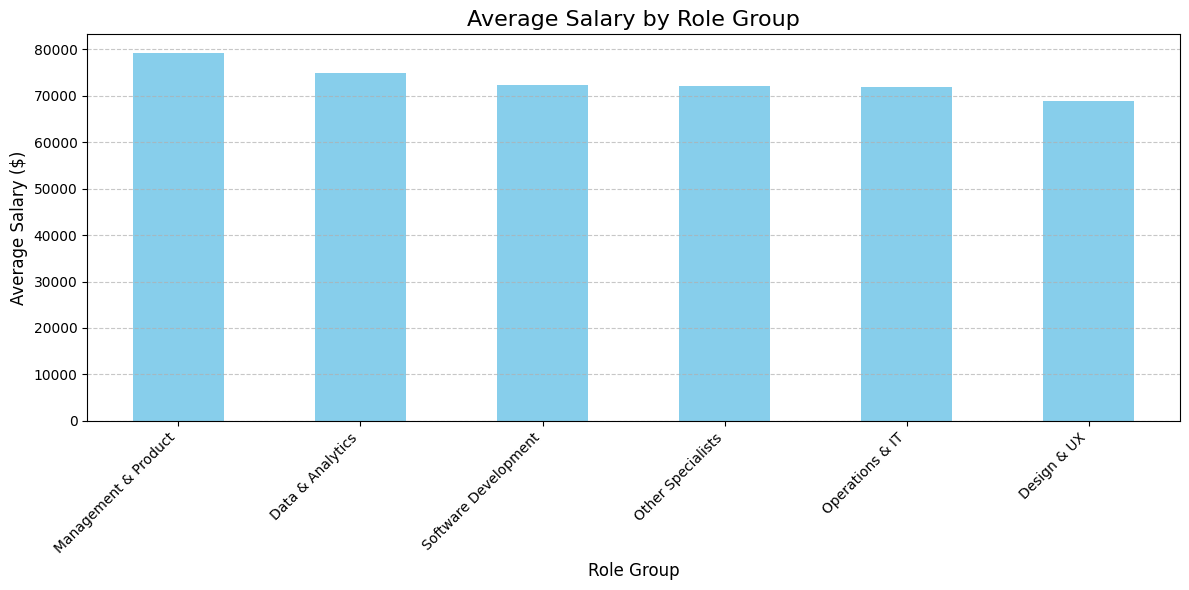

In [15]:
import matplotlib.pyplot as plt

# Group roles and calculate average salary
role_groups = {
    'Software Development': ['Software Engineer', 'Backend Developer', 'Frontend Developer', 'Full Stack Developer', 'Mobile Developer'],
    'Data & Analytics': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Business Intelligence Analyst'],
    'Design & UX': ['UX Designer', 'UI Designer', 'Graphic Designer', 'Product Designer'],
    'Management & Product': ['Product Manager', 'Project Manager', 'Technical Lead', 'Scrum Master', 'Agile Coach'],
    'Operations & IT': ['DevOps Engineer', 'System Administrator', 'Network Engineer', 'Cloud Engineer', 'IT Support Specialist'],
    'Other Specialists': ['Marketing Specialist', 'HR Specialist', 'Financial Analyst', 'Sales Manager', 'Customer Support']
}

def group_roles(role):
    for group, roles in role_groups.items():
        if any(r.lower() in role.lower() for r in roles):
            return group
    return 'Other Specialists'

df['Role Group'] = df['Role'].apply(group_roles)

avg_salary_by_role = df.groupby('Role Group')['Salary'].mean().sort_values(ascending=False)
# Create the bar plot
plt.figure(figsize=(12, 6))
avg_salary_by_role.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Role Group', fontsize=16)
plt.xlabel('Role Group', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
# for i, v in enumerate(avg_salary_by_role):
#     plt.text(i, v + 500, f'${v:,.0f}', ha='center', va='bottom')

# # Bar plot of average salary by role
# avg_salary_by_role.plot(kind='bar', color='skyblue')
# plt.title('Average Salary by Role')
# plt.xlabel('Role')
# plt.ylabel('Average Salary')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()


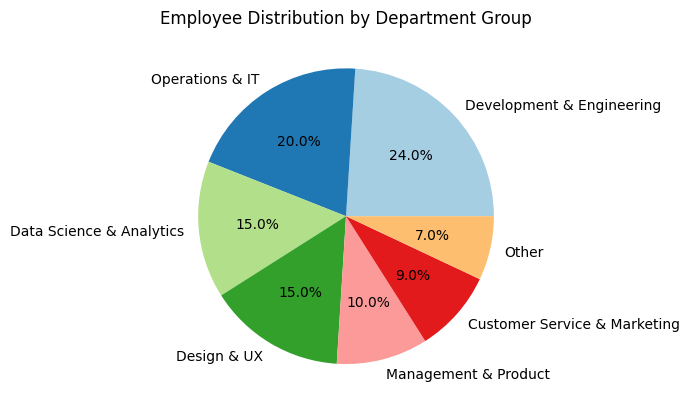

In [16]:
# Pie chart of employee distribution by department
dept_distribution.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(dept_distribution))))
plt.title('Employee Distribution by Department Group')
plt.ylabel('')
plt.show()

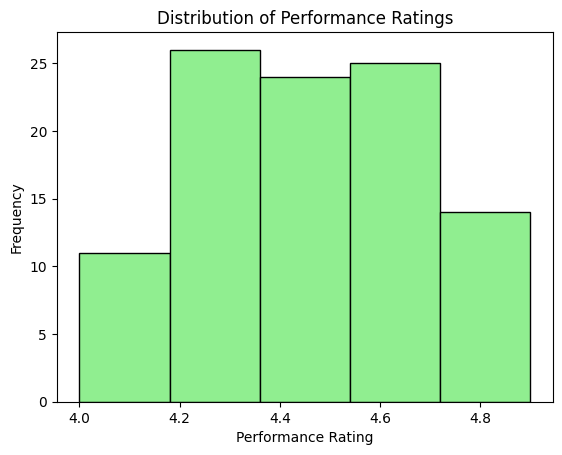

In [17]:
# Histogram of performance ratings
plt.hist(df['PerformanceRating'], bins=5, edgecolor='black', color='lightgreen')
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()


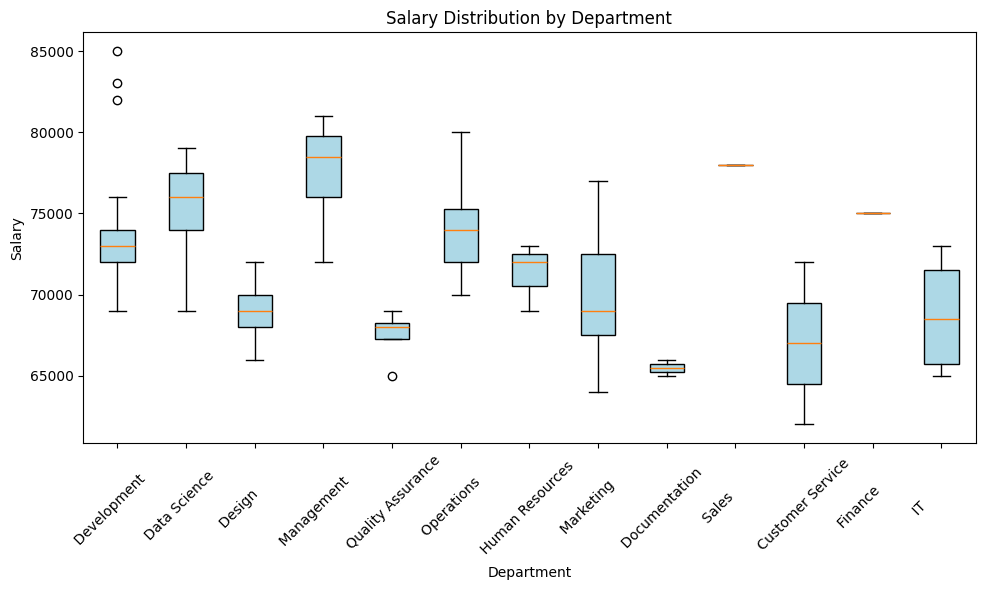

In [18]:
import matplotlib.pyplot as plt

# Box plot of salary distribution by department using Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size

# Prepare data for plotting
departments = df['Department'].unique()
data = [df[df['Department'] == dept]['Salary'] for dept in departments]

# Create the box plot
plt.boxplot(data, tick_labels=departments, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Set the title and labels
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to fit the plot elements
plt.tight_layout()

# Display the plot
plt.show()


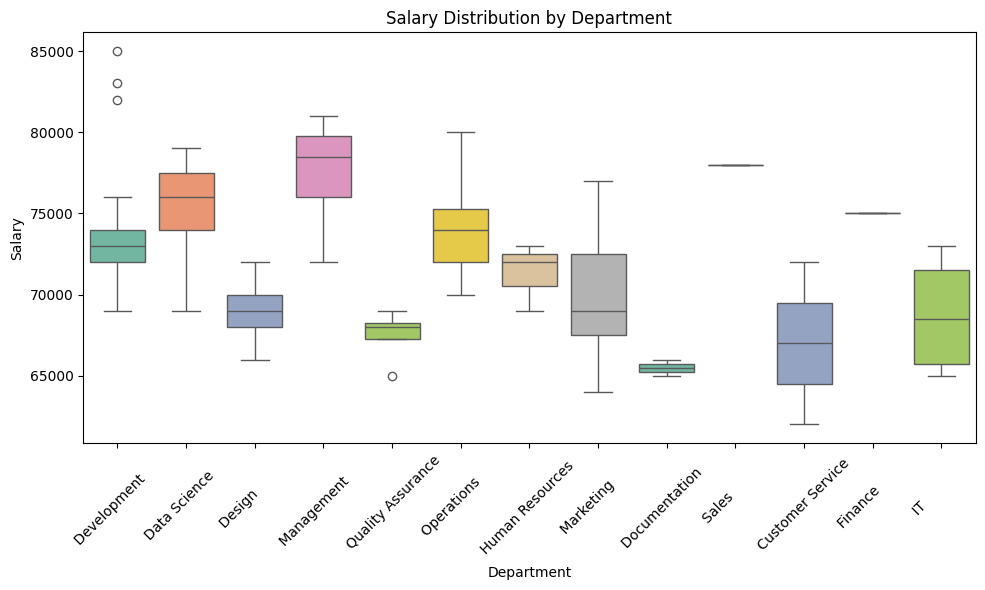

In [19]:

import seaborn as sns

# Box plot of salary distribution by department using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Department', y='Salary', data=df, palette='Set2', hue='Department')  # Create the box plot
plt.title('Salary Distribution by Department')  # Set the title of the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the plot elements
plt.show()  # Display the plot
